#Tasks

Fazer:
- como extrair canal do midi
- montar um possível CSV
- continuar o livro do briot
- começar a escrever o texto

Dúvidas:
- como lidar com notas simultâneas
- como escrever um midi em um canal separado (talvez no reaper)
- só consegui pegar informações tanto do canal quanto das notas lendo o arquivo 2x. Músicas grandes demoram muito

# Implementation

화이팅

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#enables music21 to render images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

print('installing musescore...')
!sudo apt-get install musescore

#converts midi files to wav files into order to play them
print('installing fluidsynth...')
!apt-get install fluidsynth > /dev/null
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

print("Done")

In [3]:
pip install music21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
# Importing libraries
import music21
import csv
import pandas as pd
from IPython.display import Image, Audio

In [113]:
def create_csv(strings_csv):
  # open the file in the write mode
  f = open('/content/gdrive/MyDrive/TCC - Aline/midi/Cmaj.csv', 'w')

  # create the csv writer
  writer = csv.writer(f)

  # write a row to the csv file
  for i in range(len(strings_csv)):
    writer.writerow(strings_csv[i])

  # close the file
  f.close()


def get_midi_info():
  path = "/content/gdrive/MyDrive/TCC - Aline/midi/Cmaj.MID"
  m = music21.midi.MidiFile()
  m.open(path)

  # For some reason, I could only read the channel like this but couldn't get the notes
  m.read()

  # For some reason, I could only read the notes like this but couldn't get the channel
  piece = music21.converter.parse(path).flat.getElementsByClass('Note')
  #pitches = [x.pitch.midi for x in piece]
  #durations = [x.duration.type for x in piece]

  channels = []
  strings_csv = []

  for e in m.tracks[0].events:
    if e.channel is not None:
      channels.append(e.channel)

  for i in range(len(piece)):
    print("Note:", piece[i].pitch.midi, piece[i].pitch.unicodeName, piece[i].octave, "| Duration:", piece[i].duration.type, "| Velocity:", piece[i].volume.velocity,"| Channel:", channels[i])
    temp = [piece[i].pitch.midi, piece[i].pitch, piece[i].duration.type, piece[i].volume.velocity, channels[i]]
    strings_csv.append(temp)

  create_csv(strings_csv)
  

In [111]:
get_midi_info()

Note: 60 C 4 | Duration: quarter | Velocity: 127 | Channel: 1
Note: 48 C 3 | Duration: whole | Velocity: 127 | Channel: 1
Note: 62 D 4 | Duration: quarter | Velocity: 127 | Channel: 1
Note: 64 E 4 | Duration: quarter | Velocity: 77 | Channel: 1
Note: 60 C 4 | Duration: quarter | Velocity: 126 | Channel: 1
Note: 65 F 4 | Duration: quarter | Velocity: 127 | Channel: 1
Note: 67 G 4 | Duration: quarter | Velocity: 127 | Channel: 1
Note: 55 G 3 | Duration: whole | Velocity: 127 | Channel: 1
Note: 69 A 4 | Duration: quarter | Velocity: 127 | Channel: 1
Note: 71 B 4 | Duration: quarter | Velocity: 127 | Channel: 1
Note: 72 C 5 | Duration: quarter | Velocity: 127 | Channel: 1


In [109]:
# m
# piece
# piece[0].pitch
# piece[0].pitch.midi
# piece[0].pitch.frequency
# piece[0].pitch.unicodeName # apparently this prints the sharps and flats correctly
# piece[0].name
# piece[0].octave
# piece[0].duration
# piece[0].duration.type
# piece[0].pitch.pitchClass
# piece[0].pitch.pitchClassString
# piece[0].volume
# piece[0].volume.velocity

In [114]:
def show(music):
  display(Image(str(music.write('lily.png'))))

def play(music):
  filename = music.write('mid')
  !fluidsynth -ni font.sf2 $filename -F $filename.wav -r 44100 > /dev/null
  display(Audio(filename + '.wav'))

## Cool visualization

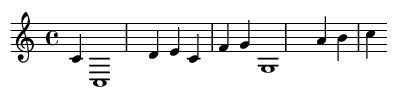

In [115]:
show(piece)

In [120]:
#play(piece)

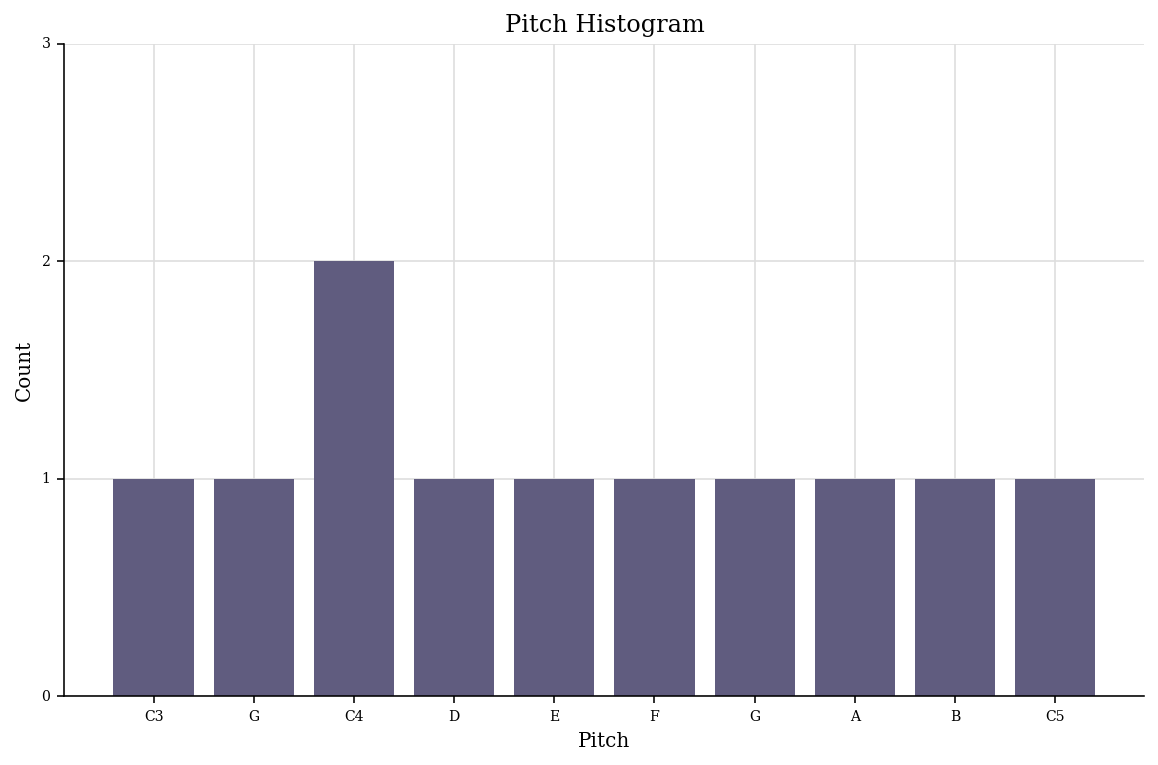

In [121]:
piece.plot('histogram', 'pitch')